In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 1. Create the dataset from the provided table
data = {
    'Year': [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
    'No_of_iPhone_Users': [1360000000, 1230000000, 1000000000, 948000000, 888000000, 814000000, 710000000, 569000000, 442000000],
    'No_of_iPhone_Users_USA': [149000000, 141000000, 138000000, 131000000, 127000000, 125000000, 114000000, 101000000, 88000000],
    'Percentage_of_iPhone_Users': [48.7, 46.9, 45.3, 45.2, 45.1, 44.2, 43.5, 43.3, 42.3],
    'No_of_iPhone_Sold': [226400000, 235700000, 206100000, 191000000, 208800000, 215800000, 215400000, 231500000, 192700000],
    'No_of_iPhone_Sold_USA': [124700000.0, 116300000.0, 113500000.0, 105200000.0, 101900000.0, 97200000.0, 90100000.0, 82500000.0, 72300000.0],
    'iOS_Market_Share': [56.74, 58.58, 59.54, 55.23, 54.82, 53.89, 53.19, 50.85, 52.30],
    'Android_Market_Share': [42.94, 41.11, 40.20, 44.51, 44.73, 45.23, 45.20, 46.42, 42.58]
}
df = pd.DataFrame(data)

# 2. Preprocessing (as per previous response)
# Feature Engineering: Create new features
df['YoY_User_Growth_Global'] = df['No_of_iPhone_Users'].pct_change() * 100
df['YoY_User_Growth_USA'] = df['No_of_iPhone_Users_USA'].pct_change() * 100
df['USA_User_Share'] = (df['No_of_iPhone_Users_USA'] / df['No_of_iPhone_Users']) * 100
df['Market_Share_Difference'] = df['iOS_Market_Share'] - df['Android_Market_Share']
df.dropna(inplace=True)

# Define features (X) and target (y)
# Let's predict 'No_of_iPhone_Sold' for this example
X = df.drop(columns=['Year', 'No_of_iPhone_Sold'])
y = df['No_of_iPhone_Sold']

# Feature Scaling: using StandardScaler on features
features_to_scale = X.columns
scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Train-Test Split (Chronological split)
# We need to use the original index for a chronological split after dropping the NaN row.
split_year_train_end = 2020
X_train = X[df['Year'] < split_year_train_end]
y_train = y[df['Year'] < split_year_train_end]

X_test = X[df['Year'] >= split_year_train_end]
y_test = y[df['Year'] >= split_year_train_end]

# 3. Model Training and Evaluation

print("--- Model Training and Evaluation ---")

# 3.1 Linear Regression (Baseline)
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R²: {lr_r2:.2f}")

# 3.2 Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

# Feature importance from Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances)

# 3.3 Gradient Boosting (XGBoost)
print("\nTraining Gradient Boosting Regressor (XGBoost)...")
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"XGBoost MSE: {xgb_mse:.2f}")
print(f"XGBoost R²: {xgb_r2:.2f}")

# Feature importance from XGBoost
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nXGBoost Feature Importances:")
print(xgb_feature_importances)



--- Model Training and Evaluation ---

Training Linear Regression...
Linear Regression MSE: 14657651235099168.00
Linear Regression R²: -65.92

Training Random Forest Regressor...
Random Forest MSE: 773554922500000.00
Random Forest R²: -2.53

Random Forest Feature Importances:
Android_Market_Share          0.378332
Market_Share_Difference       0.172083
iOS_Market_Share              0.089618
No_of_iPhone_Users            0.070079
YoY_User_Growth_Global        0.059017
USA_User_Share                0.056508
YoY_User_Growth_USA           0.053470
No_of_iPhone_Sold_USA         0.047627
No_of_iPhone_Users_USA        0.037307
Percentage_of_iPhone_Users    0.035959
dtype: float64

Training Gradient Boosting Regressor (XGBoost)...
XGBoost MSE: 1113047150100480.00
XGBoost R²: -4.08

XGBoost Feature Importances:
Android_Market_Share          0.872453
No_of_iPhone_Users            0.083769
iOS_Market_Share              0.043778
No_of_iPhone_Users_USA        0.000000
No_of_iPhone_Sold_USA         

In [3]:
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define features and target
features = df1.drop(columns=["Year", "No_of_iPhone_Sold"])
target = df1["No_of_iPhone_Sold"]

NameError: name 'MinMaxScaler' is not defined

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_preds, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Ideal line
plt.title('XGBoost: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


NameError: name 'y_test' is not defined

<Figure size 800x600 with 0 Axes>

In [3]:
# =========================
# 📌 Step 1: Import libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# =========================
# 📌 Step 2: Load the dataset
# =========================
data = {
    "Year": [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
    "No_of_iPhone_Users": [1360000000, 1230000000, 1000000000, 948000000, 888000000,
                           814000000, 710000000, 569000000, 442000000],
    "No_of_iPhone_Users_USA": [149000000, 141000000, 138000000, 131000000, 127000000,
                               125000000, 114000000, 101000000, 88000000],
    "Percentage_of_iPhone_Users": [48.7, 46.9, 45.3, 45.2, 45.1, 44.2, 43.5, 43.3, 42.3],
    "No_of_iPhone_Sold": [226400000, 235700000, 206100000, 191000000, 208800000,
                          215800000, 215400000, 231500000, 192700000],
    "No_of_iPhone_Sold_USA": [124700000.0, 116300000.0, 113500000.0, 105200000.0, 101900000.0,
                              97200000.0, 90100000.0, 82500000.0, 72300000.0],
    "iOS_Market_Share": [56.74, 58.58, 59.54, 55.23, 54.82, 53.89, 53.19, 50.85, 52.30],
    "Android_Market_Share": [42.94, 41.11, 40.20, 44.51, 44.73, 45.23, 45.20, 46.42, 42.58]
}

df = pd.DataFrame(data)
df


,Year,No_of_iPhone_Users,No_of_iPhone_Users_USA,Percentage_of_iPhone_Users,No_of_iPhone_Sold,No_of_iPhone_Sold_USA,iOS_Market_Share,Android_Market_Share
0,2022,1360000000,149000000,48.7,226400000,124700000.0,56.74,42.94
1,2021,1230000000,141000000,46.9,235700000,116300000.0,58.58,41.11
2,2020,1000000000,138000000,45.3,206100000,113500000.0,59.54,40.20
3,2019,948000000,131000000,45.2,191000000,105200000.0,55.23,44.51
4,2018,888000000,127000000,45.1,208800000,101900000.0,54.82,44.73
5,2017,814000000,125000000,44.2,215800000,97200000.0,53.89,45.23
6,2016,710000000,114000000,43.5,215400000,90100000.0,53.19,45.20
7,2015,569000000,101000000,43.3,231500000,82500000.0,50.85,46.42
8,2014,442000000,88000000,42.3,192700000,72300000.0,52.30,42.58


In [5]:
# =========================
# 📌 Step 3: Feature Engineering
# =========================

# Missing values check
print("Missing values:\n", df.isnull().sum())

# Create new engineered features
df["USA_users_share"] = df["No_of_iPhone_Users_USA"] / df["No_of_iPhone_Users"]
df["USA_sales_share"] = df["No_of_iPhone_Sold_USA"] / df["No_of_iPhone_Sold"]
df["sales_per_user_global"] = df["No_of_iPhone_Sold"] / df["No_of_iPhone_Users"]
df["sales_per_user_USA"] = df["No_of_iPhone_Sold_USA"] / df["No_of_iPhone_Users_USA"]

# Year-over-year growth/change
df["YoY_users_growth"] = df["No_of_iPhone_Users"].pct_change().fillna(0.0)
df["YoY_sales_growth"] = df["No_of_iPhone_Sold"].pct_change().fillna(0.0)
df["YoY_iOS_share_change"] = df["iOS_Market_Share"].diff().fillna(0.0)
df["YoY_android_share_change"] = df["Android_Market_Share"].diff().fillna(0.0)

df.head()


Missing values:
 Year                          0
No_of_iPhone_Users            0
No_of_iPhone_Users_USA        0
Percentage_of_iPhone_Users    0
No_of_iPhone_Sold             0
No_of_iPhone_Sold_USA         0
iOS_Market_Share              0
Android_Market_Share          0
dtype: int64


,Year,No_of_iPhone_Users,No_of_iPhone_Users_USA,Percentage_of_iPhone_Users,No_of_iPhone_Sold,No_of_iPhone_Sold_USA,iOS_Market_Share,Android_Market_Share,USA_users_share,USA_sales_share,sales_per_user_global,sales_per_user_USA,YoY_users_growth,YoY_sales_growth,YoY_iOS_share_change,YoY_android_share_change
0,2022,1360000000,149000000,48.7,226400000,124700000.0,56.74,42.94,0.109559,0.550795,0.166471,0.836913,0.000000,0.000000,0.00,0.00
1,2021,1230000000,141000000,46.9,235700000,116300000.0,58.58,41.11,0.114634,0.493424,0.191626,0.824823,-0.095588,0.041078,1.84,-1.83
2,2020,1000000000,138000000,45.3,206100000,113500000.0,59.54,40.20,0.138000,0.550704,0.206100,0.822464,-0.186992,-0.125583,0.96,-0.91
3,2019,948000000,131000000,45.2,191000000,105200000.0,55.23,44.51,0.138186,0.550785,0.201477,0.803053,-0.052000,-0.073265,-4.31,4.31
4,2018,888000000,127000000,45.1,208800000,101900000.0,54.82,44.73,0.143018,0.488027,0.235135,0.802362,-0.063291,0.093194,-0.41,0.22


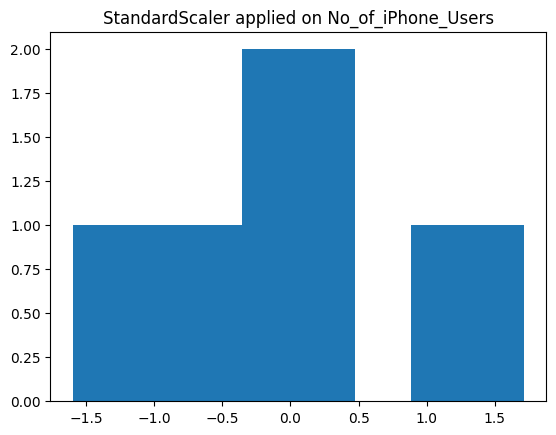

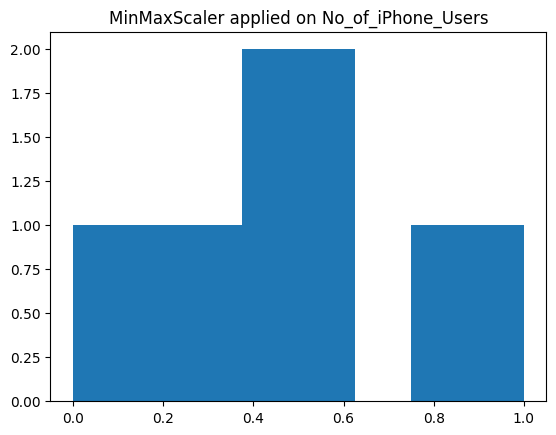

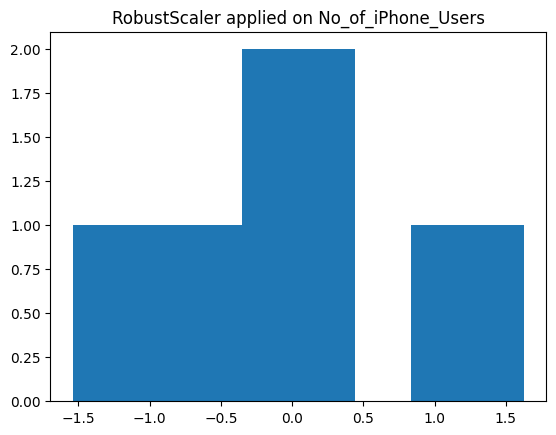

In [6]:
# =========================
# 📌 Step 5: Feature Scaling
# =========================
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

features = df.drop(columns=["Year", "No_of_iPhone_Sold"])
target = df["No_of_iPhone_Sold"]

# Apply three scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Show distributions before & after scaling for one example feature
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(features)
    plt.figure()
    plt.hist(scaled[:,0], bins=8)
    plt.title(f"{name} applied on {features.columns[0]}")
    plt.show()


In [7]:
# =========================
# 📌 Step 6: Train-Test Split
# =========================
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)


Train size: (5, 14)
Validation size: (2, 14)
Test size: (2, 14)


In [8]:
# =========================
# 📌 Step 7: Model Training & Evaluation
# =========================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(kernel="rbf", C=10, epsilon=0.1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    results[name] = {
        "MAE": mean_absolute_error(y_val, preds),
        "RMSE": mean_squared_error(y_val, preds, squared=False),
        "R2": r2_score(y_val, preds)
    }

results_df = pd.DataFrame(results).T
results_df


TypeError: got an unexpected keyword argument 'squared'

In [9]:
# =========================
# 📌 Step 7: Model Training & Evaluation
# =========================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(kernel="rbf", C=10, epsilon=0.1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    results[name] = {
        "MAE": mean_absolute_error(y_val, preds),
        "RMSE": mean_squared_error(y_val, preds, squared=False),
        "R2": r2_score(y_val, preds)
    }

results_df = pd.DataFrame(results).T
results_df


TypeError: got an unexpected keyword argument 'squared'

In [10]:
# =========================
# 📌 Step 8: Final Test Evaluation (Best Model)
# =========================
best_model_name = results_df["MAE"].idxmin()
best_model = models[best_model_name]

# Retrain on Train+Val
X_trainval = pd.concat([X_train, X_val])
y_trainval = pd.concat([y_train, y_val])
best_model.fit(X_trainval, y_trainval)

# Evaluate on Test
test_preds = best_model.predict(X_test)

final_metrics = {
    "MAE": mean_absolute_error(y_test, test_preds),
    "RMSE": mean_squared_error(y_test, test_preds, squared=False),
    "R2": r2_score(y_test, test_preds)
}
final_metrics


NameError: name 'results_df' is not defined

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 1. Create the dataset from the provided table
data = {
    'Year': [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014],
    'No_of_iPhone_Users': [1360000000, 1230000000, 1000000000, 948000000, 888000000, 814000000, 710000000, 569000000, 442000000],
    'No_of_iPhone_Users_USA': [149000000, 141000000, 138000000, 131000000, 127000000, 125000000, 114000000, 101000000, 88000000],
    'Percentage_of_iPhone_Users': [48.7, 46.9, 45.3, 45.2, 45.1, 44.2, 43.5, 43.3, 42.3],
    'No_of_iPhone_Sold': [226400000, 235700000, 206100000, 191000000, 208800000, 215800000, 215400000, 231500000, 192700000],
    'No_of_iPhone_Sold_USA': [124700000.0, 116300000.0, 113500000.0, 105200000.0, 101900000.0, 97200000.0, 90100000.0, 82500000.0, 72300000.0],
    'iOS_Market_Share': [56.74, 58.58, 59.54, 55.23, 54.82, 53.89, 53.19, 50.85, 52.30],
    'Android_Market_Share': [42.94, 41.11, 40.20, 44.51, 44.73, 45.23, 45.20, 46.42, 42.58]
}
df = pd.DataFrame(data)

# 2. Preprocessing (as per previous response)
# Feature Engineering: Create new features
df['YoY_User_Growth_Global'] = df['No_of_iPhone_Users'].pct_change() * 100
df['YoY_User_Growth_USA'] = df['No_of_iPhone_Users_USA'].pct_change() * 100
df['USA_User_Share'] = (df['No_of_iPhone_Users_USA'] / df['No_of_iPhone_Users']) * 100
df['Market_Share_Difference'] = df['iOS_Market_Share'] - df['Android_Market_Share']
df.dropna(inplace=True)

# Define features (X) and target (y)
# Let's predict 'No_of_iPhone_Sold' for this example
X = df.drop(columns=['Year', 'No_of_iPhone_Sold'])
y = df['No_of_iPhone_Sold']

# Feature Scaling: using StandardScaler on features
features_to_scale = X.columns
scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Train-Test Split (Chronological split)
# We need to use the original index for a chronological split after dropping the NaN row.
split_year_train_end = 2020
X_train = X[df['Year'] < split_year_train_end]
y_train = y[df['Year'] < split_year_train_end]

X_test = X[df['Year'] >= split_year_train_end]
y_test = y[df['Year'] >= split_year_train_end]

# 3. Model Training and Evaluation

print("--- Model Training and Evaluation ---")

# 3.1 Linear Regression (Baseline)
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R²: {lr_r2:.2f}")

# 3.2 Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

# Feature importance from Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances)

# 3.3 Gradient Boosting (XGBoost)
print("\nTraining Gradient Boosting Regressor (XGBoost)...")
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"XGBoost MSE: {xgb_mse:.2f}")
print(f"XGBoost R²: {xgb_r2:.2f}")

# Feature importance from XGBoost
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nXGBoost Feature Importances:")
print(xgb_feature_importances)



--- Model Training and Evaluation ---

Training Linear Regression...
Linear Regression MSE: 14657651235099168.00
Linear Regression R²: -65.92

Training Random Forest Regressor...
Random Forest MSE: 773554922500000.00
Random Forest R²: -2.53

Random Forest Feature Importances:
Android_Market_Share          0.378332
Market_Share_Difference       0.172083
iOS_Market_Share              0.089618
No_of_iPhone_Users            0.070079
YoY_User_Growth_Global        0.059017
USA_User_Share                0.056508
YoY_User_Growth_USA           0.053470
No_of_iPhone_Sold_USA         0.047627
No_of_iPhone_Users_USA        0.037307
Percentage_of_iPhone_Users    0.035959
dtype: float64

Training Gradient Boosting Regressor (XGBoost)...
XGBoost MSE: 1113047150100480.00
XGBoost R²: -4.08

XGBoost Feature Importances:
Android_Market_Share          0.872453
No_of_iPhone_Users            0.083769
iOS_Market_Share              0.043778
No_of_iPhone_Users_USA        0.000000
No_of_iPhone_Sold_USA         